In [2]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Tips From A Restaurant

     total_bill    tip     sex smoker   day    time  size  tip_percentage    gender_time
23        39.42   7.58    Male     No   Sat  Dinner     4        0.192288    Male_Dinner
47        32.40   6.00    Male     No   Sun  Dinner     4        0.185185    Male_Dinner
59        48.27   6.73    Male     No   Sat  Dinner     4        0.139424    Male_Dinner
88        24.71   5.85    Male     No  Thur   Lunch     2        0.236746     Male_Lunch
141       34.30   6.70    Male     No  Thur   Lunch     6        0.195335     Male_Lunch
170       50.81  10.00    Male    Yes   Sat  Dinner     3        0.196812    Male_Dinner
183       23.17   6.50    Male    Yes   Sun  Dinner     4        0.280535    Male_Dinner
212       48.33   9.00    Male     No   Sat  Dinner     4        0.186220    Male_Dinner
214       28.17   6.50  Female    Yes   Sat  Dinner     3        0.230742  Female_Dinner
239       29.03   5.92    Male     No   Sat  Dinner     3        0.203927    Male_Dinner


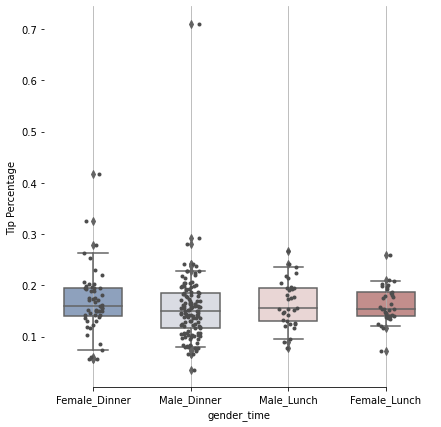

In [6]:
tips = sns.load_dataset("tips")
tips["tip_percentage"] = tips["tip"]/tips["total_bill"]
tips["gender_time"] = tips["sex"].str.cat(tips["time"], sep="_")

f, ax = plt.subplots(figsize=(7, 7))
sns.stripplot(x="gender_time", y="tip_percentage", data=tips,
              size=4, color=".3", linewidth=0)

sns.boxplot(x="gender_time", y="tip_percentage", data=tips,
            whis=[5, 95], width=.6, palette="vlag")

ax.xaxis.grid(True)
ax.set(ylabel="Tip Percentage")
sns.despine(trim=True, left=True)

df_outliers = tips[np.abs(stats.zscore(tips["tip"]))>2]

# For easy to read form, use to_string()
print(df_outliers.to_string())

In [7]:
df = sns.load_dataset("tips")

def bin_calculator(df_column)->list:
    
    min_val = df_column.min()
    Q1= df_column.quantile(0.10)
    median_low = df_column.quantile(0.30)
    median_high = df_column.quantile(0.70)
    Q3 = df_column.quantile(0.90)
    max_val = df_column.max()
    
    return [min_val, Q1, median_low, median_high, Q3, max_val]

price_labels = ["very_low_price", "low_price", "average_price", "high_price", "very_high_price"]
price_bins = bin_calculator(df["total_bill"])


# After an operation in which we reformat the df (such as sorting [df.sort()]) we 
# copy the processes df and the original df is unaffected. If we want to change the original 
# df, we need to provide the kwarg: inplace = True.

df['bill_price_category'] = pd.cut(df['total_bill'],
                                   bins=price_bins,
                                   labels=price_labels,
                                   include_lowest=True)
expensive_purchases_info = df.query("bill_price_category == 'very_high_price' and sex == 'Male'") 

# If you provide inplace=True kwarg creates a copy of df
# or you can do the following:

expensive_purchases_df = expensive_purchases_info.copy(deep=True)
print(expensive_purchases_df.head().to_string())

    total_bill   tip   sex smoker   day    time  size bill_price_category
23       39.42  7.58  Male     No   Sat  Dinner     4     very_high_price
47       32.40  6.00  Male     No   Sun  Dinner     4     very_high_price
56       38.01  3.00  Male    Yes   Sat  Dinner     4     very_high_price
59       48.27  6.73  Male     No   Sat  Dinner     4     very_high_price
83       32.68  5.00  Male    Yes  Thur   Lunch     2     very_high_price


In [8]:
df1 = sns.load_dataset("tips")
price_labels = ["very_low", "low", "average", "high", "very_high"]
df1["price_label"] = pd.qcut(df1["total_bill"],
                            q=5,
                            labels=price_labels)
print(df1)

     total_bill   tip     sex smoker   day    time  size price_label
0         16.99  1.01  Female     No   Sun  Dinner     2     average
1         10.34  1.66    Male     No   Sun  Dinner     3    very_low
2         21.01  3.50    Male     No   Sun  Dinner     3        high
3         23.68  3.31    Male     No   Sun  Dinner     2        high
4         24.59  3.61  Female     No   Sun  Dinner     4        high
..          ...   ...     ...    ...   ...     ...   ...         ...
239       29.03  5.92    Male     No   Sat  Dinner     3   very_high
240       27.18  2.00  Female    Yes   Sat  Dinner     2   very_high
241       22.67  2.00    Male    Yes   Sat  Dinner     2        high
242       17.82  1.75    Male     No   Sat  Dinner     2     average
243       18.78  3.00  Female     No  Thur  Dinner     2     average

[244 rows x 8 columns]


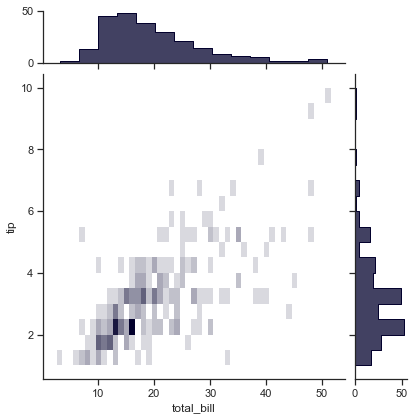

In [9]:
tips.head(5)

sns.set_theme(style="ticks")

g = sns.JointGrid(data=tips, x="total_bill", y="tip", marginal_ticks=True)
g.plot_joint(
    sns.histplot, discrete=(True, False),
    cmap="light:#03012d"
)
g.plot_marginals(sns.histplot, element="step", color="#03012d")

[Text(0.5, 0, 'Day of the Week'),
 Text(0, 0.5, 'Amount of Tips (in USD)'),
 Text(0.5, 1.0, 'Distribution of Tips on Days of the Week')]

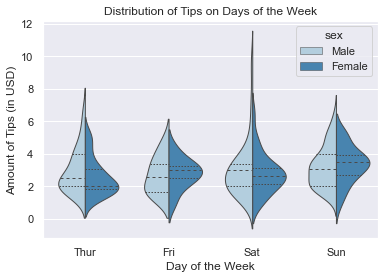

In [10]:
sns.set_theme(style="darkgrid")
ax = sns.violinplot(data=tips, 
               x="day", y="tip", hue="sex", split=True,
               palette="Blues", inner="quartile", linewidth=1)

ax.set(xlabel="Day of the Week", 
       ylabel="Amount of Tips (in USD)", 
       title="Distribution of Tips on Days of the Week")